## Data Analysis

In [2]:
f = open('tgconv_train.json')
lines = f.readlines()
dataset = []

for line in lines:
    dataset.append(eval(line.strip()))

print(len(dataset))
print(dataset[0])

10741
{'dialog': ['i also remodel homes when i am not out bow hunting .', "that's neat . when i was in high school i placed 6th in 100m dash !", "that's awesome . do you have a favorite season or time of year ?", 'i do not . but i do have a favorite meat since that is all i eat exclusively .', 'what is your favorite meat to eat ?', 'i would have to say its prime rib . do you have any favorite foods ?', 'i like chicken or macaroni and cheese .'], 'concepts': [['home', 'bow', 'hunting', 'remodel'], ['school', 'dash', 'place'], ['season', 'time', 'year'], ['eat', 'meat'], ['eat', 'meat'], ['rib', 'food'], ['macaroni', 'chicken', 'cheese']], 'easy_target': 'chicken', 'hard_target': 'antiquark', 'entity_path': ['home', 'place', 'time', 'eat', 'meat', 'food', 'chicken']}


In [11]:
concept_statistics = []

for data in dataset:
    extracted_concepts = data['concepts']
    lengths = [len(concepts) for concepts in extracted_concepts]
    concept_statistics.extend(lengths)

print(len(concept_statistics))

70205


[4, 3, 2, 1, 5, 6, 7, 8, 9, 10]
[14399, 19496, 17402, 8424, 7190, 2549, 609, 120, 15, 1]
<class 'collections.Counter'>


Text(0.5, 1.0, 'Extracted Concept Number')

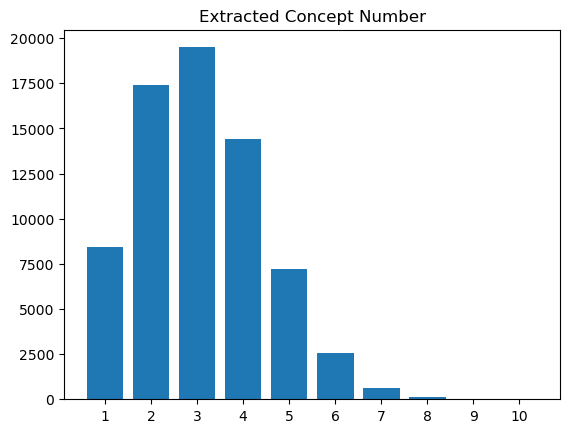

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

result = Counter(concept_statistics)
print([x for x in result])
print([result[x] for x in result])
print(type(result))


plt.bar([x for x in result], [result[x] for x in result])
plt.xticks([x for x in result])
plt.title('Extracted Concept Number')

In [7]:
from Knowledge.ConceptNet import ConceptNet

conceptnet = ConceptNet('../../Knowledge/Data/conceptnet_en.txt')

2206782it [00:22, 96504.67it/s] 


1.121382700217486 1.089766775158938


In [8]:
p1, p1w = conceptnet.shortest_path('neat', 'food')
p2, p2w = conceptnet.shortest_path('tidy', 'food')

print(p1, p2)

['neat', 'clean', 'cloth', 'kitchen', 'food'] ['tidy', 'clean', 'cloth', 'kitchen', 'food']


## Blenderbot Finetune Dataset

In [1]:
from Training.BlenderBot.Dataset import BlenderbotFinetuneDataset

In [2]:
dataset = BlenderbotFinetuneDataset()

In [4]:
dataset.dataset[3]

{'prompts': "<k>eat meat</k><s>i also remodel homes when i am not out bow hunting .</s><s>that's neat . when i was in high school i placed 6th in 100m dash !</s><s>that's awesome . do you have a favorite season or time of year ?</s><s>i do not . but i do have a favorite meat since that is all i eat exclusively .</s>",
 'response': 'what is your favorite meat to eat ?'}